In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models, preprocessing
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

np.random.seed(1234)

# Question 1

### Reading in file from Elon Musk's Tweets Dataset 2022 from Kaggle.com

In [2]:
df = pd.read_csv('emails.csv')
df.shape

(5172, 3002)

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


### Divide into Train/Test

In [4]:
data = df.values
X, y = data[:, 1:3001], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

print(X.shape, y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

(5172, 3000) (5172,)
(4137, 3000) (1035, 3000) (4137,) (1035,)


# Question 2 
###  Create a sequential model and evaluate on the test data

In [5]:
from keras.models import Sequential
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
X_val = X_train[:3000]
partial_X_train = X_train[3000:]

y_val = y_train[:3000]
partial_y_train = y_train[3000:]

In [7]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))


Epoch 1/20
3/3 [==============================] - 1s 93ms/step - loss: 1.6857 - accuracy: 0.3096 - val_loss: 0.7017 - val_accuracy: 0.6220
Epoch 2/20
3/3 [==============================] - 0s 26ms/step - loss: 0.7132 - accuracy: 0.6297 - val_loss: 0.7041 - val_accuracy: 0.7260
Epoch 3/20
3/3 [==============================] - 0s 24ms/step - loss: 0.6711 - accuracy: 0.7247 - val_loss: 0.5921 - val_accuracy: 0.7720
Epoch 4/20
3/3 [==============================] - 0s 27ms/step - loss: 0.5825 - accuracy: 0.7995 - val_loss: 0.6026 - val_accuracy: 0.7720
Epoch 5/20
3/3 [==============================] - 0s 25ms/step - loss: 0.6078 - accuracy: 0.7757 - val_loss: 0.5739 - val_accuracy: 0.7863
Epoch 6/20
3/3 [==============================] - 0s 25ms/step - loss: 0.5737 - accuracy: 0.7995 - val_loss: 0.5225 - val_accuracy: 0.8490
Epoch 7/20
3/3 [==============================] - 0s 25ms/step - loss: 0.5055 - accuracy: 0.8584 - val_loss: 0.4722 - val_accuracy: 0.8753
Epoch 8/20
3/3 [===========

In [8]:
from sklearn.metrics import classification_report

pred = model.predict(X_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

33/33 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       719
         1.0       0.99      0.60      0.75       316

    accuracy                           0.88      1035
   macro avg       0.92      0.80      0.83      1035
weighted avg       0.89      0.88      0.86      1035



In [9]:
losses_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
losses_and_metrics

9/9 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8754


[0.3537578880786896, 0.8753623366355896]

In [10]:
classes = model.predict(X_test, batch_size=128)
classes[:5]

9/9 [==============================] - 0s 2ms/step


array([[0.01126047],
       [0.7040208 ],
       [0.03501591],
       [0.11170562],
       [0.99775326]], dtype=float32)

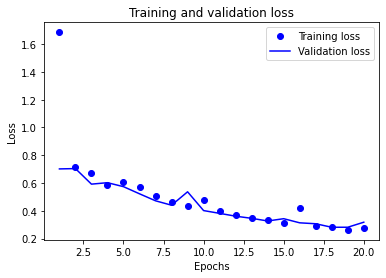

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



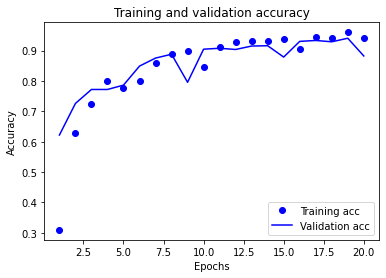

In [12]:
plt.clf()   # clear

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # min change in metrics
    patience=4,     # min epochs 
    restore_best_weights=True,
)


In [14]:
# fit the model again with early stopping

model.fit(X_train, y_train, callbacks=[early_stopping], batch_size=512)
results = model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 1ms/step - loss: 0.7090 - accuracy: 0.7643


In [15]:
results

[0.7089790105819702, 0.7642512321472168]

In [16]:
pred = model.predict(X_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

33/33 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.85       719
         1.0       1.00      0.23      0.37       316

    accuracy                           0.76      1035
   macro avg       0.87      0.61      0.61      1035
weighted avg       0.82      0.76      0.71      1035



# Question 3
###  Try a different architecture like RNN, CNN, etc and evaluate on the test data

In [17]:
#RNN
max_features = 10000
maxlen = 500
batch_size = 32

model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
26/26 [==============================] - 27s 1s/step - loss: 0.6008 - accuracy: 0.7123 - val_loss: 0.5873 - val_accuracy: 0.7186
Epoch 2/10
26/26 [==============================] - 27s 1s/step - loss: 0.5900 - accuracy: 0.7126 - val_loss: 0.5742 - val_accuracy: 0.7186
Epoch 3/10
26/26 [==============================] - 27s 1s/step - loss: 0.5830 - accuracy: 0.7153 - val_loss: 0.5654 - val_accuracy: 0.7162
Epoch 4/10
26/26 [==============================] - 26s 1s/step - loss: 0.5844 - accuracy: 0.7147 - val_loss: 0.5679 - val_accuracy: 0.7150
Epoch 5/10
26/26 [==============================] - 26s 1s/step - loss: 0.5768 - accuracy: 0.7202 - val_loss: 0.5656 - val_accuracy: 0.7150
Epoch 6/10
26/26 [==============================] - 26s 1s/step - loss: 0.5780 - accuracy: 0.7153 - val_loss: 0.5694 - val_accuracy: 0.7138
Epoch 7/10
26/26 [==============================] - 26s 1s/step - loss: 0.5831 - accuracy: 0.7126 - val_loss: 0.5725 - val_accuracy: 0.7186
Epoch 8/10
26/26 [==

In [21]:
pred = model.predict(X_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

33/33 [==============================] - 3s 78ms/step
              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       719
         1.0       0.68      0.05      0.09       316

    accuracy                           0.70      1035
   macro avg       0.69      0.52      0.46      1035
weighted avg       0.70      0.70      0.60      1035



In [22]:
#LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
26/26 [==============================] - 65s 2s/step - loss: 0.6266 - accuracy: 0.6951 - val_loss: 0.5935 - val_accuracy: 0.7186
Epoch 2/10
26/26 [==============================] - 64s 2s/step - loss: 0.5967 - accuracy: 0.7126 - val_loss: 0.5919 - val_accuracy: 0.7186
Epoch 3/10
26/26 [==============================] - 63s 2s/step - loss: 0.5961 - accuracy: 0.7126 - val_loss: 0.5880 - val_accuracy: 0.7186
Epoch 4/10
26/26 [==============================] - 63s 2s/step - loss: 0.5933 - accuracy: 0.7126 - val_loss: 0.5880 - val_accuracy: 0.7186
Epoch 5/10
26/26 [==============================] - 63s 2s/step - loss: 0.5905 - accuracy: 0.7126 - val_loss: 0.5822 - val_accuracy: 0.7186
Epoch 6/10
26/26 [==============================] - 64s 2s/step - loss: 0.5889 - accuracy: 0.7123 - val_loss: 0.5779 - val_accuracy: 0.7186
Epoch 7/10
26/26 [==============================] - 64s 2s/step - loss: 0.5864 - accuracy: 0.7126 - val_loss: 0.5756 - val_accuracy: 0.7198
Epoch 8/10
26/26 [==

In [25]:
pred = model.predict(X_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

33/33 [==============================] - 7s 195ms/step
              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       719
         1.0       0.42      0.02      0.03       316

    accuracy                           0.69      1035
   macro avg       0.56      0.50      0.42      1035
weighted avg       0.61      0.69      0.58      1035



In [26]:
#GRU
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
26/26 [==============================] - 78s 3s/step - loss: 0.6206 - accuracy: 0.6948 - val_loss: 0.5913 - val_accuracy: 0.7186
Epoch 2/10
26/26 [==============================] - 70s 3s/step - loss: 0.5940 - accuracy: 0.7126 - val_loss: 0.5838 - val_accuracy: 0.7186
Epoch 3/10
26/26 [==============================] - 69s 3s/step - loss: 0.5908 - accuracy: 0.7126 - val_loss: 0.5808 - val_accuracy: 0.7186
Epoch 4/10
26/26 [==============================] - 69s 3s/step - loss: 0.5893 - accuracy: 0.7123 - val_loss: 0.5776 - val_accuracy: 0.7186
Epoch 5/10
26/26 [==============================] - 69s 3s/step - loss: 0.5869 - accuracy: 0.7123 - val_loss: 0.5763 - val_accuracy: 0.7162
Epoch 6/10
26/26 [==============================] - 67s 3s/step - loss: 0.5856 - accuracy: 0.7120 - val_loss: 0.5730 - val_accuracy: 0.7174
Epoch 7/10
26/26 [==============================] - 67s 3s/step - loss: 0.5833 - accuracy: 0.7120 - val_loss: 0.5730 - val_accuracy: 0.7174
Epoch 8/10
26/26 [==

In [28]:
pred = model.predict(X_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

33/33 [==============================] - 6s 162ms/step
              precision    recall  f1-score   support

         0.0       0.69      0.99      0.82       719
         1.0       0.27      0.01      0.02       316

    accuracy                           0.69      1035
   macro avg       0.48      0.50      0.42      1035
weighted avg       0.57      0.69      0.57      1035



In [29]:
#CNN
max_features = 3000
maxlen = 3000
batch_size = 32

model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 3000, 128)         384000    
                                                                 
 conv1d (Conv1D)             (None, 2994, 32)          28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 598, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 592, 32)           7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 1)                

In [31]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),  # set learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
26/26 [==============================] - 23s 856ms/step - loss: 0.6220 - accuracy: 0.7126 - val_loss: 0.5919 - val_accuracy: 0.7186
Epoch 2/10
26/26 [==============================] - 22s 843ms/step - loss: 0.5944 - accuracy: 0.7126 - val_loss: 0.5882 - val_accuracy: 0.7186
Epoch 3/10
26/26 [==============================] - 22s 843ms/step - loss: 0.5877 - accuracy: 0.7126 - val_loss: 0.5854 - val_accuracy: 0.7186
Epoch 4/10
26/26 [==============================] - 22s 850ms/step - loss: 0.5820 - accuracy: 0.7126 - val_loss: 0.5821 - val_accuracy: 0.7186
Epoch 5/10
26/26 [==============================] - 22s 845ms/step - loss: 0.5769 - accuracy: 0.7126 - val_loss: 0.5763 - val_accuracy: 0.7186
Epoch 6/10
26/26 [==============================] - 23s 868ms/step - loss: 0.5726 - accuracy: 0.7126 - val_loss: 0.5734 - val_accuracy: 0.7186
Epoch 7/10
26/26 [==============================] - 24s 923ms/step - loss: 0.5659 - accuracy: 0.7126 - val_loss: 0.5687 - val_accuracy: 0.7186

In [32]:
from sklearn.metrics import classification_report
pred = model.predict(X_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

33/33 [==============================] - 1s 36ms/step
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82       719
         1.0       0.00      0.00      0.00       316

    accuracy                           0.69      1035
   macro avg       0.35      0.50      0.41      1035
weighted avg       0.48      0.69      0.57      1035



C:\Users\aurel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aurel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aurel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Question 4
###   Try different embedding approaches and evaluate on the test data

In [33]:
max_features = 3000
maxlen = 3000
model = models.Sequential()
model.add(layers.Embedding(max_features, 8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 3000, 8)           24000     
                                                                 
 flatten (Flatten)           (None, 24000)             0         
                                                                 
 dense_7 (Dense)             (None, 16)                384016    
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 408,033
Trainable params: 408,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
104/104 [==============================] - 1s 9ms/step - loss: 0.4887 - acc: 0.7610 - val_loss: 0.3561 - val_acc: 0.7717
Epoch 2/10
104/104 [============================

In [34]:
pred = model.predict(X_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

33/33 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       719
         1.0       0.96      0.96      0.96       316

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



# Question 5
###   Write up your analysis of the performance of various approaches

From a quick glance the accuracies of the models are listed from lowest to highest: (CNN, GRU, and LSTM) all had .69, RNN with .70, 1st sequential with early stopping at .76, then the first seq without early stopping at .88, and finally embedding method at .97.

Overall the embedding method had the best scores. Followed by 1st seq, 1st seq w/early stopping, RNN, LSTM, GRU, and lastly CNN.